In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
sns.set_theme()

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
#Matriz de datos (observaciones x características)
X=np.matrix(df.iloc[:,:4])

In [37]:
Y=df.loc[:,'species']
classes=pd.unique(df.loc[:,'species'])

### Estandarización
Media cero desviación 1 para cada característica

In [38]:
Xs=(X-np.mean(X,axis=0))/(np.std(X, axis=0))

print('Media de cada característica: ',np.round(np.mean(Xs, axis=0), 2))
print('Std  de cada característica: ',np.round(np.std(Xs, axis=0), 2))

Media de cada característica:  [[-0. -0.  0. -0.]]
Std  de cada característica:  [[1. 1. 1. 1.]]


### Matriz de covarianza

In [39]:
Sigma=Xs.T@Xs

### Vectores y valores propios

In [40]:
eigenvalues, eigenvectors = np.linalg.eig(Sigma)

### Matriz diagonal con valores propios

In [41]:
D = np.diag(eigenvalues)
print(D)

[[436.62271256   0.           0.           0.        ]
 [  0.         138.18313961   0.           0.        ]
 [  0.           0.          22.10299175   0.        ]
 [  0.           0.           0.           3.09115609]]


### Matriz de coeficientes

In [42]:
Mtx = Sigma@eigenvectors

In [43]:
#suma de los valores propios
sum_eigenvalues = np.sum(eigenvalues)

#Proporción de la varianza explicada
prop_var = eigenvalues/sum_eigenvalues

#2. Calculate the cumulative variance
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]

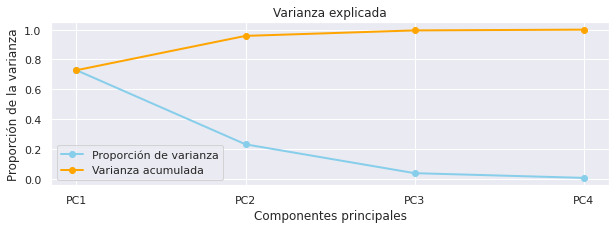

In [44]:
x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]
plt.figure(figsize=(10,3))
plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proporción de varianza')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Varianza acumulada")
plt.legend()
plt.title('Varianza explicada')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de la varianza')
plt.show()

In [45]:
Z=Xs@Mtx #Componentes princiaples

### Gráfica de los datos
Los gráficos se muestran en 2 variables, no obstante, los datos cuenta con 4 variables originales y 4 componenetes principales.

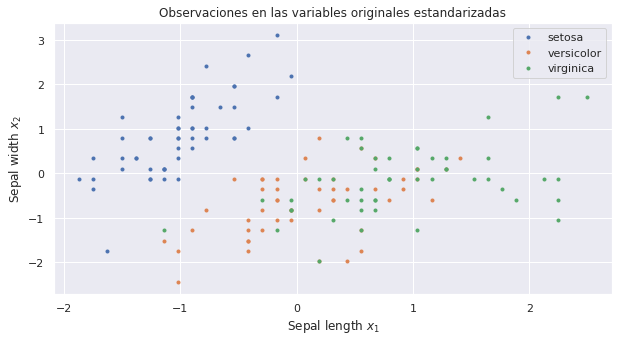

In [46]:
plt.figure(figsize=(10,5))
for i in classes:
  ind=np.where(Y==i)[0]
  plt.plot(Xs[ind,0], Xs[ind,1], '.')
plt.title('Observaciones en las variables originales estandarizadas')
plt.xlabel('Sepal length $x_1$')
plt.ylabel('Sepal width $x_2$')
plt.legend(classes)

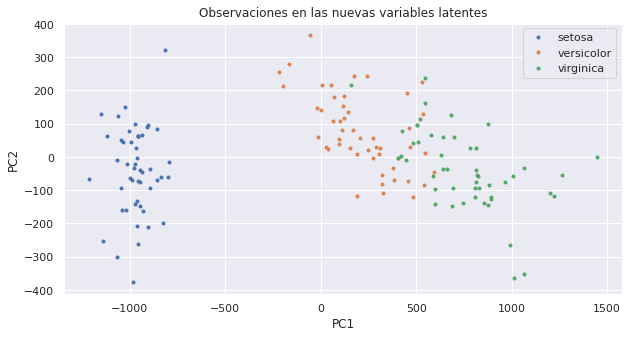

In [47]:
plt.figure(figsize=(10,5))
for i in classes:
  ind=np.where(Y==i)[0]
  plt.plot(Z[ind,0], Z[ind,1], '.')
plt.title('Observaciones en las nuevas variables latentes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(classes)